In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.mixture import GaussianMixture
from sklearn.metrics import accuracy_score, confusion_matrix

# Data

In [2]:
data = pd.read_csv('../input/iris/Iris.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
sepal_X = data[['SepalLengthCm', 'SepalWidthCm']]
petal_X = data[['PetalLengthCm', 'PetalWidthCm']]
y = data['Species'].astype("category").cat.codes
num_cat = y.nunique()
categories = data['Species'].astype("category").cat.categories

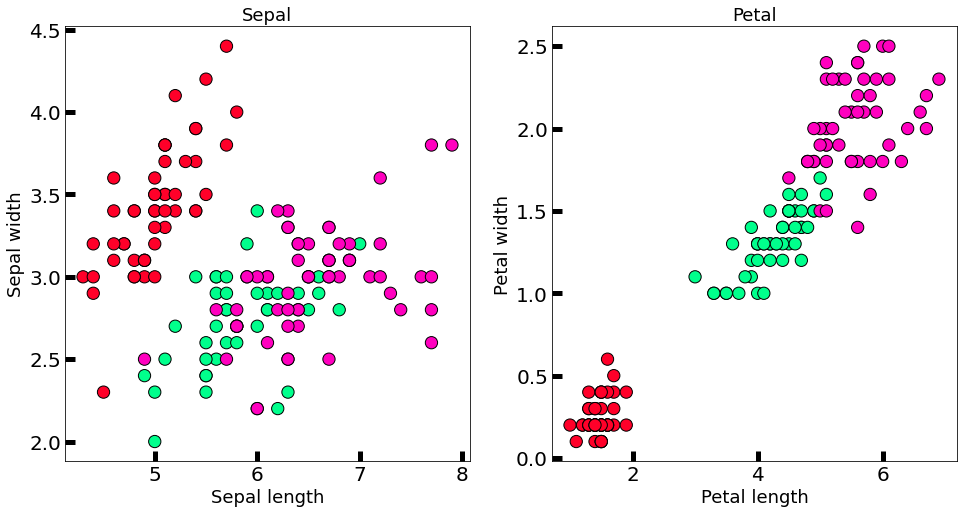

In [4]:
fig, axes = plt.subplots(1, 2, figsize=(16,8))
axes[0].scatter(sepal_X.SepalLengthCm, sepal_X.SepalWidthCm, c=y, cmap='gist_rainbow', edgecolor='k', s=150)
axes[1].scatter(petal_X.PetalLengthCm, petal_X.PetalWidthCm, c=y, cmap='gist_rainbow', edgecolor='k', s=150)
axes[0].set_xlabel('Sepal length', fontsize=18)
axes[0].set_ylabel('Sepal width', fontsize=18)
axes[1].set_xlabel('Petal length', fontsize=18)
axes[1].set_ylabel('Petal width', fontsize=18)
axes[0].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[1].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[0].set_title('Sepal', fontsize=18)
axes[1].set_title('Petal', fontsize=18)
plt.show()

# Model

In [5]:
model_sepal = GaussianMixture(n_components=3)
sepal_labels = model_sepal.fit_predict(sepal_X)
model_petal = GaussianMixture(n_components=3)
petal_labels = model_petal.fit_predict(petal_X)

# Analysis

In [6]:
def plot_actualvpredicted(X, y, predicted, part):
    fig, axes = plt.subplots(1, 2, figsize=(16,8))
    axes[0].scatter(X[f'{part}LengthCm'], X[f'{part}WidthCm'], c=y, cmap='gist_rainbow', edgecolor='k', s=150)
    axes[1].scatter(X[f'{part}LengthCm'], X[f'{part}WidthCm'], c=predicted, cmap='jet', edgecolor='k', s=150)
    axes[0].set_xlabel(f'{part} length', fontsize=18)
    axes[0].set_ylabel(f'{part} width', fontsize=18)
    axes[1].set_xlabel(f'{part} length', fontsize=18)
    axes[1].set_ylabel(f'{part} width', fontsize=18)
    axes[0].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
    axes[1].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
    axes[0].set_title('Actual', fontsize=18)
    axes[1].set_title('Predicted', fontsize=18)
    plt.show()
    
def plot_confusion(accuracy, confusion, part):
    print(f'{part} Accuracy: {accuracy}')

    fig, ax = plt.subplots()
    im = ax.imshow(confusion)

    ax.set_xticks(range(num_cat))
    ax.set_yticks(range(num_cat))
    ax.set_xticklabels(categories)
    ax.set_yticklabels(categories)

    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    for i in range(num_cat):
        for j in range(num_cat):
            text = ax.text(j, i, confusion[i, j],
                           ha="center", va="center", color="w")

    ax.set_title(f"{part} Confusion Matrix (Actual / Predicted)")
    fig.tight_layout()
    plt.show()

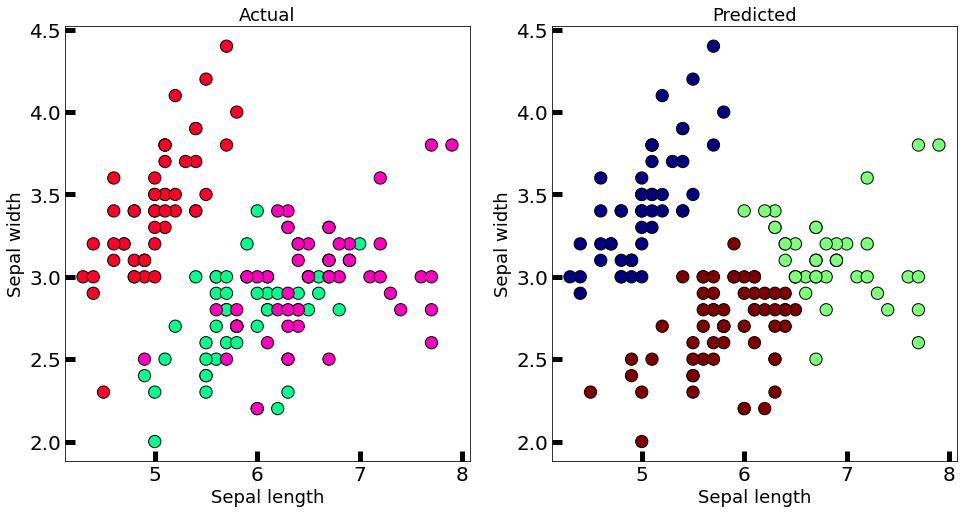

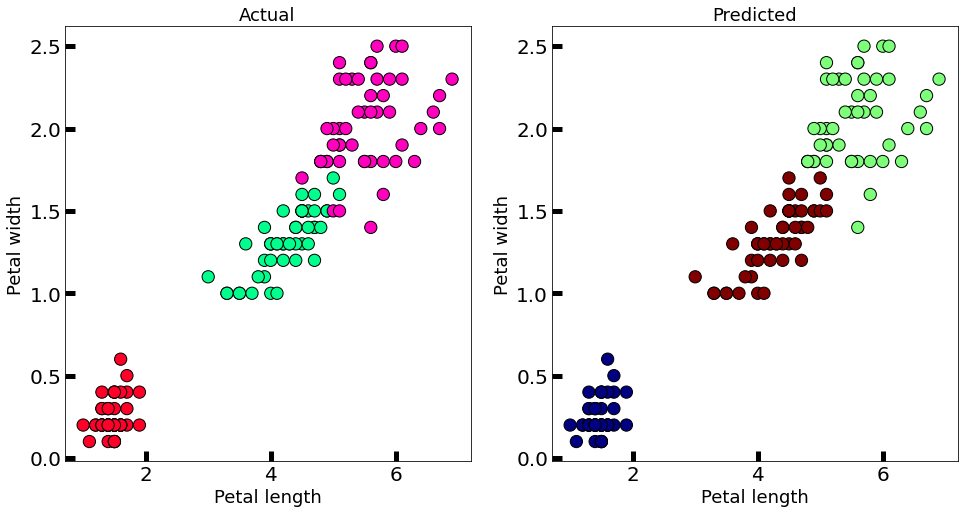

In [7]:
plot_actualvpredicted(sepal_X, y, sepal_labels, 'Sepal')
plot_actualvpredicted(petal_X, y, petal_labels, 'Petal')

In [8]:
sepal_accuracy = accuracy_score(y, sepal_labels)
petal_accuracy = accuracy_score(y, petal_labels)

sepal_confusion = confusion_matrix(y, sepal_labels)
petal_confusion = confusion_matrix(y, petal_labels)

Sepal Accuracy: 0.5266666666666666


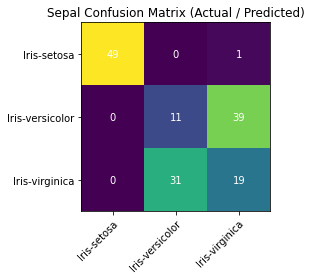

Petal Accuracy: 0.36


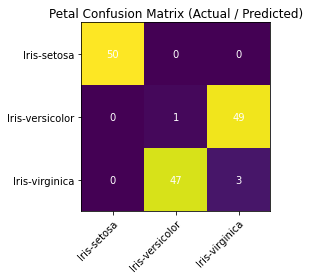

In [9]:
plot_confusion(sepal_accuracy, sepal_confusion, 'Sepal')
plot_confusion(petal_accuracy, petal_confusion, 'Petal')

# Comparison with K-Means

When we compare the results of the GaussianMixture model (uses EM algorithm) with that of [K-Means clustering](https://github.com/ajaycs18/ML/blob/main/Lab%206/k-means-iris.ipynb) we observe that both give almost equal accuracies:
- K-Means: 0.5133333333333333 (*Sepal*) & 0.37333333333333335 (*Petal*)
- GaussianMixture: 0.5333333333333333 (*Sepal*) & 0.02 (*Petal*)

GaussianMixture performs slightly better when classified based on the *Sepal* length & width. Likewise K-Means performs slightly better when classified based on the *Petal* length & width. 